# 3-D Ising Model

We will investigate the 3-d Ising model with Monte Carlo methods.

## Compile with swig

In [1]:
! swig -c++ -python swig/ising3d.i
! python swig/setup_ising3d.py build_ext --inplace

running build_ext
building '_ising3d' extension
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.7m -c swig/ising3d_wrap.cxx -o build/temp.linux-x86_64-3.7/swig/ising3d_wrap.o -I./ -std=c++11 -O3
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.7m -c ising3d.cpp -o build/temp.linux-x86_64-3.7/ising3d.o -I./ -std=c++11 -O3
x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protector-strong -Wformat -Werro

## Import from swig

In [2]:
import sys
import os
sys.path.append( os.path.abspath("swig") )
import ising3d
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

## Run the simulations for various temperatures


Also plot the average magnetization as a function of the MC step. 

In [4]:
L = 20
J = 1.0
T = 2.0
H = 0.0
MCSteps = 80000

eAvgVals = []
mAvgVals = []
e2AvgVals = []
m2AvgVals = []
i = ising3d.Ising(J, L, T, H)
Tvals = np.arange(0.02,5.52,0.02)

for T in Tvals:
    i.set_T(T)
    i.compute_boltzmann_factors()
    i.reset_averages()
    i.run(MCSteps)
    mvals = i.get_mvals()
    #plt.plot(mvals, label="%3.2f" % (T))
    eAvgVals.append( i.get_eAvg() )
    e2AvgVals.append( i.get_e2Avg() )
    mAvgVals.append( i.get_mAvg() )
    m2AvgVals.append( i.get_m2Avg() )
#     print(i.get_T(),i.get_H(),i.get_eAvg(),i.get_mAvg() )



### Plot average magnetization versus temperature

In [5]:
def fit_func(T, Tc, b):
    if T <= Tc:
        return (1.0 - (np.sinh(2.0/T))**(-4) )**b
    else:
        return 0.0

def fitfunc_vec_self(T, Tc, b):
    y = np.zeros(T.shape)
    for i in range(len(y)):
        y[i]=fit_func(T[i],Tc,b)
    return y


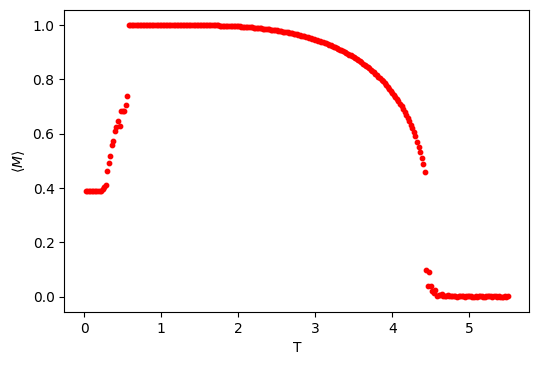

In [43]:
plt.scatter(Tvals, np.abs(mAvgVals),c= 'red', s= 10.0)
plt.xlabel("T")
plt.ylabel(r'$\langle M \rangle$')
plt.show()

### Plot average energy per spin versus Temperature

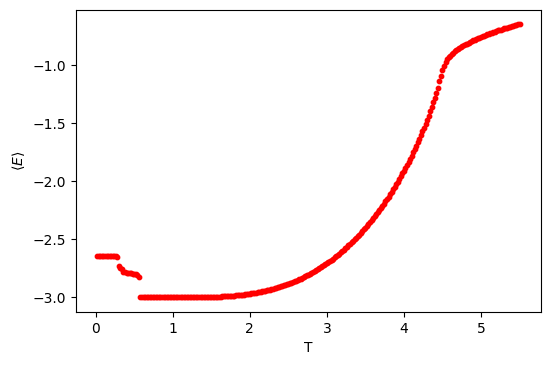

In [39]:
plt.scatter(Tvals, eAvgVals , c= 'red', s= 10.0)
plt.xlabel("T")
plt.ylabel(r'$\langle E \rangle$')
plt.show()

In [40]:
def find_Der(yvals, xvals):
    ''' f     : name of function to be differentiated
        x     : the point at which df/dx is required
        h     : step size
    '''
    
    nn = len(yvals)
    dfdx = np.zeros(nn)
    #for i in range(2,nn-2):
        #dfdx[i+2] = ( yvals[i-2] - 8*yvals[i-1] + 8*yvals[i+1] - yvals[i+2]) / (12*(xvals[i+1] - xvals[i]) )
    for i in range(0,nn-1):    
        dfdx [i+1] = (yvals[i+1] -yvals[i])/(xvals[i+1] - xvals[i])
    return dfdx


### Specific Heat $C_v = \frac{d\langle E \rangle}{dT}$

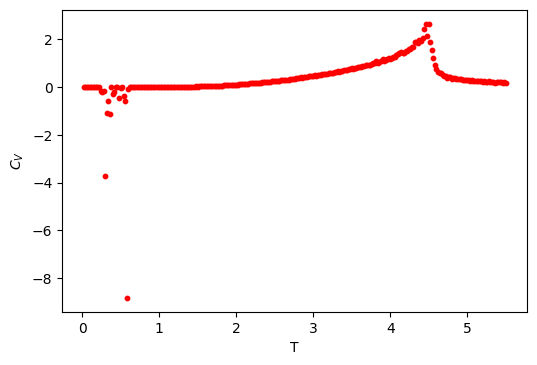

In [41]:
dEdT = find_Der(eAvgVals, Tvals)
plt.scatter(Tvals, dEdT , c= 'red', s= 10.0)
plt.xlabel("T")
plt.ylabel(r'$C_V$')
plt.show()

### Magnetic susceptibility $\chi = \frac{\langle M^2 \rangle - \langle M \rangle^2}{T}$

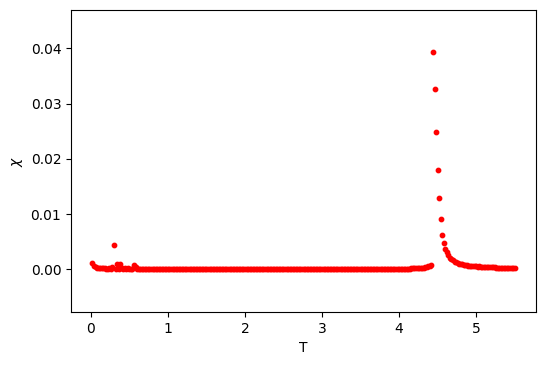

In [42]:
chi = (m2AvgVals - np.square(mAvgVals))/Tvals
plt.scatter(Tvals, chi , c= 'red', s= 10.0)
plt.xlabel("T")
plt.ylabel(r'$\chi$')
plt.show()

## Compilation of plots

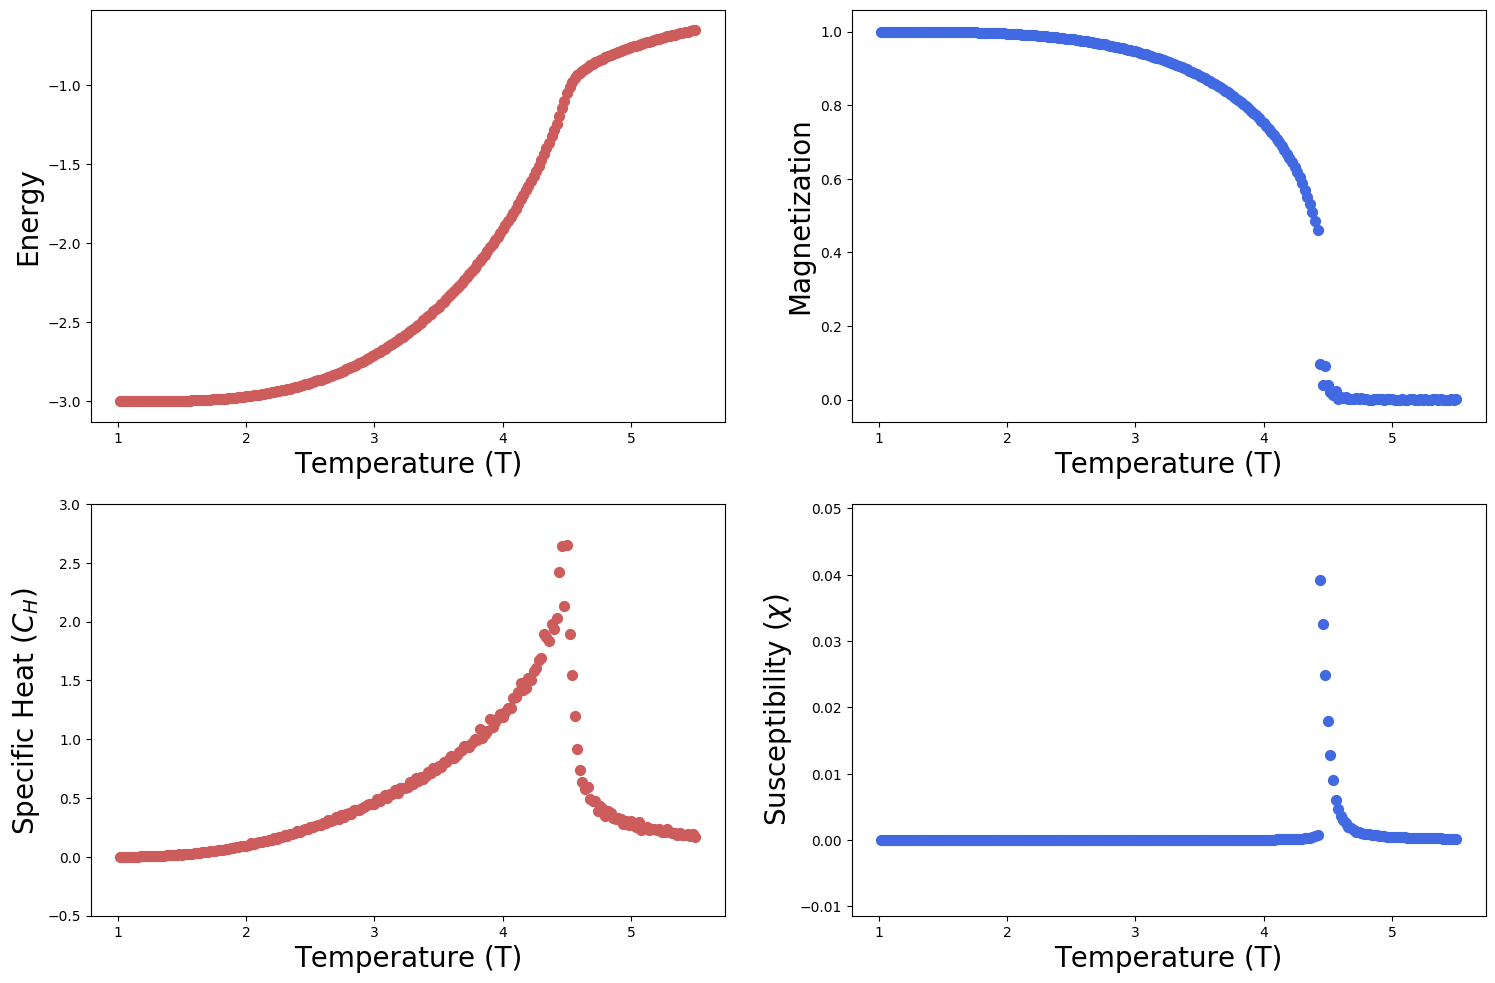

In [36]:
f = plt.figure(figsize=(18, 12)); # plot the calculated values    


sp =  f.add_subplot(2, 2, 1 );
plt.scatter(Tvals[50:], eAvgVals[50:], s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel('Energy', fontsize=20);         #plt.axis('tight');
# plt.xlim(1.0,5.52)

sp =  f.add_subplot(2, 2, 2 );
plt.scatter(Tvals[50:], np.abs(mAvgVals[50:]), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization", fontsize=20);   #plt.axis('tight');
# plt.xlim(1.0,5.52)

sp =  f.add_subplot(2, 2, 3 );
plt.scatter(Tvals[50:],dEdT[50:], s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ($C_H$) ", fontsize=20);   #plt.axis('tight'); 
# plt.xlim(1.0,5.52)
plt.ylim(-0.5,3.0)

sp =  f.add_subplot(2, 2, 4 );
plt.scatter(Tvals[50:], chi[50:], s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility ($\chi$)", fontsize=20);   #plt.axis('tight');
# plt.xlim(1.0,5.52)

# plt.savefig("paperdata/3D_ising.pdf")